In [63]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# 데이터 불러오기
boston = pd.read_csv("Boston_house.csv")

In [9]:
# boston데이터 확인
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [5]:
# boston에서 target열 지운 df을 boston_data에 저장(axis=1 : 열기준 옵션) 
boston_data = boston.drop(['Target'],axis=1)

In [6]:
# boston_data 데이터 통계 뽑아보기
boston_data.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170,22.532806
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994,9.197104
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000,5.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000,17.025000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000,21.200000
75%,94.075000,396.225000,6.623500,3.677083,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000,25.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000,50.000000


In [8]:
#boston_ data 변수 설명
'''
타겟 데이터
1978 보스턴 주택 가격
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

특징 데이터
CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율'''

'\n타겟 데이터\n1978 보스턴 주택 가격\n506개 타운의 주택 가격 중앙값 (단위 1,000 달러)\n\n특징 데이터\nCRIM: 범죄율\nINDUS: 비소매상업지역 면적 비율\nNOX: 일산화질소 농도\nRM: 주택당 방 수\nLSTAT: 인구 중 하위 계층 비율\nB: 인구 중 흑인 비율\nPTRATIO: 학생/교사 비율\nZN: 25,000 평방피트를 초과 거주지역 비율\nCHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0\nAGE: 1940년 이전에 건축된 주택의 비율\nRAD: 방사형 고속도로까지의 거리\nDIS: 직업센터의 거리\nTAX: 재산세율'

In [10]:
## crim/rm/lstat 세게의 변수로 각각 단순 선형 회귀 분석하기

In [11]:
# target 변수 설정 : 'Target', 'CRIM', 'RM' , 'LSTAT'
target = boston[['Target']]
crim=boston[['CRIM']]
rm=boston[['RM']]
lstat=boston['LSTAT']

In [12]:
## target ~ crim 선형회귀분석

In [14]:
## statsmodels.api(sm) 사용해서 crime변수에 상수항 추가하기
crim1 = sm.add_constant(crim, has_constant='add')
crim1

,const,CRIM
0,1.0,0.00632
1,1.0,0.02731
2,1.0,0.02729
3,1.0,0.03237
4,1.0,0.06905
...,...,...
501,1.0,0.06263
502,1.0,0.04527
503,1.0,0.06076
504,1.0,0.10959


In [15]:
## sm.OLS(y값, 데이터) 이용해서 (모델을) 회귀분석 적합시키기

model1 = sm.OLS(target,crim1)
fitted_model1=model1.fit()

In [16]:
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           1.17e-19
Time:                        18:44:01   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
## 1. 범죄율이 설명하는 y의 총 변동성은 15% 정도 된다
## 2. 범죄율에 해당하는 회귀 계수 값은 -0.4로 범죄율이 1단위  증가할 때 y가 0.4단위 감소한다.
## -> 이때, p값은 0.000으로 매우 유의미하다고 볼 수 있다.

In [18]:
## 회귀 계수 출력
fitted_model1.params

const    24.033106
CRIM     -0.415190
dtype: float64

In [19]:
## y_hat=beta0 + beta1 * X 회귀식 이용해서 y_hat계산하기
(np.dot(crim1,fitted_model1.params))

array([ 24.03048217,  24.02176733,  24.02177563,  24.01966646,
        24.00443729,  24.02071274,  23.99644902,  23.97309042,
        23.94540138,  23.96250722,  23.93973403,  23.98433377,
        23.99416963,  23.77163594,  23.76823138,  23.77261995,
        23.59552468,  23.70751396,  23.69982879,  23.73176107,
        23.51337514,  23.67934745,  23.52139661,  23.62271965,
        23.72160552,  23.68412214,  23.75413567,  23.63627976,
        23.71216824,  23.61689868,  23.56360486,  23.4706396 ,
        23.45682622,  23.55492323,  23.36347899,  24.00646341,
        23.99265003,  23.99983283,  23.96042712,  24.02163447,
        24.01915993,  23.98019433,  23.97435675,  23.96694145,
        23.98216648,  23.96193426,  23.95490093,  23.9379155 ,
        23.92770182,  23.94185981,  23.99626634,  24.01509937,
        24.01085198,  24.01242555,  24.02745959,  24.02766303,
        24.02457401,  24.02716065,  23.96898004,  23.99022532,
        23.97110996,  23.96181385,  23.98732314,  23.98

In [21]:
## predict함수 이용해서 y_hat계산하기
pred1=fitted_model1.predict(crim1)
pred1

0      24.030482
1      24.021767
2      24.021776
3      24.019666
4      24.004437
         ...    
501    24.007103
502    24.014311
503    24.007879
504    23.987605
505    24.013422
Length: 506, dtype: float64

In [22]:
## 직접 구한 y_hat과 predict함수를 통해 구한 y_hat차이 계산하기
pred1-np.dot(crim1,fitted_model1.params)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Length: 506, dtype: float64

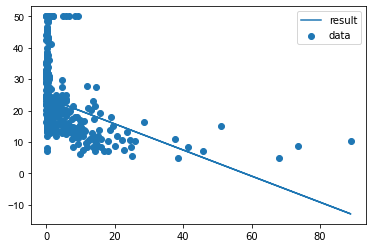

In [23]:
## 적합시킨 직선 시각화 하기

import matplotlib.pyplot as plt
plt.yticks(fontname = "Arial") #

## 범죄율과 target에 대한 산점도 그리기
plt.scatter(crim,target,label="data")

## 범죄율과 predict한 pred1의 직선 그리기
plt.plot(crim,pred1,label="result")

## 범례 표시하기
plt.legend()

## 그래프 보여줘!
plt.show()

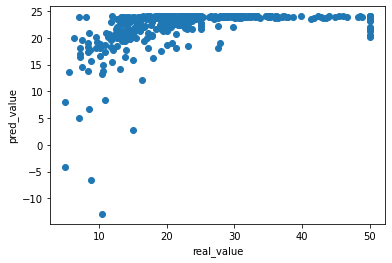

In [24]:
## x축 : 실제값, y축 : prediction 값 으로 시각화

plt.scatter(target,pred1)
plt.xlabel("real_value")
plt.ylabel("pred_value")
plt.show()

In [25]:
## -> 위의 시각화 자료를 보니 회귀직선이 잘 적합된 것 같지는 않음!

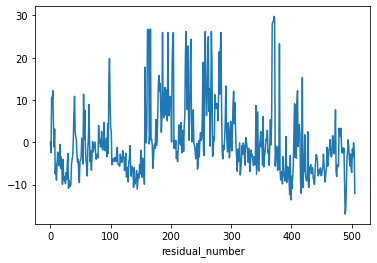

In [26]:
## residual 시각화
## 이때 residual은  fitted_model1 안에 있는 함수를 통해서 가져올 수 있음!

fitted_model1.resid.plot()
plt.xlabel("residual_number")
plt.show()

In [27]:
## -> 위의 잔차 plot을 보면 균일하지 않음
## -> 따라서 범죄율을 변수로 보스턴의 집값을 판단하기에는 적합하지 않다.

In [30]:
##잔차의 합계산해보기

np.sum(fitted_model1.resid)
sum(fitted_model1.resid)

-3.693045869113121e-12

## 이번에는 rm변수 단순선형회귀분석 적합시키기

In [33]:
## statsmodels.api(sm) 사용해서 rm변수에 상수항 추가하기
rm1 = sm.add_constant(rm, has_constant='add')

## sm.OLS(y값, 데이터) 이용해서 (모델을) 회귀분석 적합시키기
model2 = sm.OLS(target,rm1)
fitted_model2=model2.fit()

## 적합시킨 모델의 회귀분석 결과
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           2.49e-74
Time:                        22:43:23   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
## 1. 방의 개수가 설명하는 y의 총 변동성은 48% 정도 된다
## 2. 방의 개수에 해당하는 회귀 계수 값은 9.1로 
##    방의 개수가 1단위  증가할 때 y가 9.1단위 증가한다.
## -> 이때, p값은 0.000으로 매우 유의미하다고 볼 수 있다.

In [35]:
## predict함수 이용해서 y_hat계산하기
pred2=fitted_model2.predict(rm1)
pred2

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

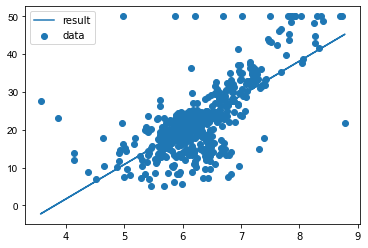

In [36]:
## 적합시킨 직선 시각화 하기

import matplotlib.pyplot as plt
plt.yticks(fontname = "Arial") #

## 방의 개수와 target에 대한 산점도 그리기
plt.scatter(rm,target,label="data")

## 방의 개수와 predict한 pred2의 직선 그리기
plt.plot(rm,pred2,label="result")

## 범례 표시하기
plt.legend()

## 그래프 보여줘!
plt.show()

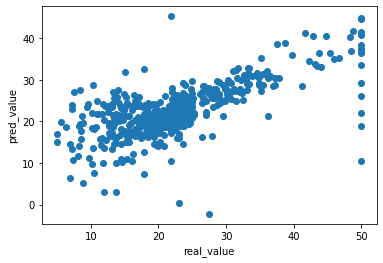

In [37]:
## x축 : 실제값, y축 : prediction 값 으로 시각화

plt.scatter(target,pred2)
plt.xlabel("real_value")
plt.ylabel("pred_value")
plt.show()

In [38]:
## -> 위의 시각화 자료를 보니 회귀직선이 잘 적합된 것 같음!

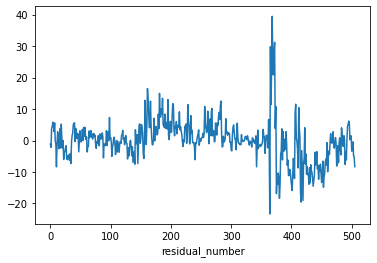

In [39]:
## residual 시각화
## 이때 residual은  fitted_model2 안에 있는 함수를 통해서 가져올 수 있음!

fitted_model2.resid.plot()
plt.xlabel("residual_number")
plt.show()

In [27]:
## -> 위의 잔차 plot을 보면 균일하지 않음
## -> 따라서 방의 개수를 변수로 보스턴의 집값을 판단하기에는 적합하지 않다.

## 이번에는 lstat변수 단순선형회귀분석 적합시키기

In [40]:
## statsmodels.api(sm) 사용해서 lstat변수에 상수항 추가하기
lstat1 = sm.add_constant(lstat, has_constant='add')

## sm.OLS(y값, 데이터) 이용해서 (모델을) 회귀분석 적합시키기
model3 = sm.OLS(target,lstat1)
fitted_model3=model3.fit()

## 적합시킨 모델의 회귀분석 결과
fitted_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           5.08e-88
Time:                        22:51:20   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
## 1. 인구 중 하위 계층 비율이 설명하는 y의 총 변동성은 54.4% 정도 된다
## 2. 인구 중 하위 계층 비율에 해당하는 회귀 계수 값은 -0.95로 
##    인구 중 하위 계층 비율이 1단위  증가할 때 y가 0.95단위 감소한다.
## -> 이때, p값은 0.000으로 매우 유의미하다고 볼 수 있다.
## -> 지금까지 진행한 세 변수 중 '인구 중 
##    하위 계층 비율'이 설명하는 y의 총 변동성이 가장 크므로
##    세 변수 중에는 보스턴 집값을 가장 잘 설명한다고 생각할 수 있다.

In [43]:
## predict함수 이용해서 y_hat계산하기
pred3=fitted_model3.predict(lstat1)
pred3

0      29.822595
1      25.870390
2      30.725142
3      31.760696
4      29.490078
         ...    
501    25.366864
502    25.927393
503    29.195563
504    28.397521
505    27.067452
Length: 506, dtype: float64

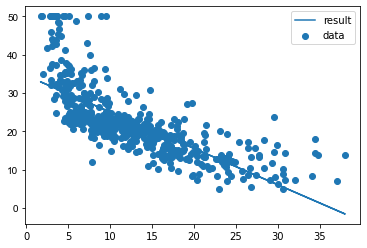

In [44]:
## 적합시킨 직선 시각화 하기

import matplotlib.pyplot as plt
plt.yticks(fontname = "Arial") #

## 인구 중 하위 계층 비율와 target에 대한 산점도 그리기
plt.scatter(lstat,target,label="data")

## 인구 중 하위 계층 비율와 predict한 pred3의 직선 그리기
plt.plot(lstat, pred3,label="result")

## 범례 표시하기
plt.legend()

## 그래프 보여줘!
plt.show()

In [45]:
## -> 위의 시각화 자료를 보니 회귀직선이 잘 적합된 것 같음!

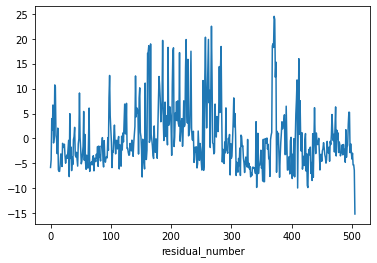

In [46]:
## residual 시각화
## 이때 residual은  fitted_model3 안에 있는 함수를 통해서 가져올 수 있음!

fitted_model3.resid.plot()
plt.xlabel("residual_number")
plt.show()

In [27]:
## -> 위의 잔차 plot을 보면 균일하지 않음
## -> 따라서 인구 중 하위 계층 비율을 변수로 보스턴의 집값을 판단하기에는 적합하지 않다.

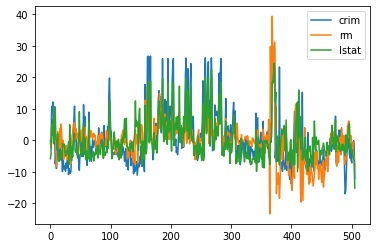

In [48]:
## 세 변수의 잔차 플랏 비교
fitted_model1.resid.plot(label="crim")
fitted_model2.resid.plot(label="rm")
fitted_model3.resid.plot(label="lstat")
plt.legend()

In [49]:
## -> 세 잔차 플랏을 보니, lstat변수가 0 주변으로 가장가까이에 있는 것을 보니
##    세 변수 중에 lstat이 가장 안전한....(?) 것을 확인할 수 있다.
## -> 결국 R^2 값만을 보면, 
##    인구 중 하위 계층 비율을 변수로 보스턴의 집값을 판단하는 것이 가장 나은 것 같다.

## 다중선형회귀분석_crim, rm, lstat 세개의 변수를 통한 다중회귀적합

In [50]:
## boston 데이터에서 'CRIM','RM','LSTAT'만 가져오기

x_data=boston[['CRIM','RM','LSTAT']]
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [51]:
## 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant='add')

In [52]:
## 회귀모델 적합
multi_model = sm.OLS(target,x_data1)
fitted_multi_model=multi_model.fit()

In [53]:
## summary함수를 통해 회귀분석 결과 출력
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Sat, 19 Feb 2022   Prob (F-statistic):          1.01e-112
Time:                        23:19:09   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
## 1. crim, rm, lstat 세개의 변수기 설명하는 y의 총 변동성은 64.6% 정도 된다.
## 2. crim 변수에 해당하는 회귀 계수 값은 -0.1
##    rm 변수에 해당하는 회귀 계수 값은 5.22
##    lstat 변수에 해당하는 회귀 계수 값은 -0.58이다.

## -> 이때, p값은 0.001, 0.000, 0.000 으로 매우 유의미하다고 볼 수 있다.

In [55]:
## 단순선형회귀모델의 회귀계수와 비교
print(fitted_model1.params)
print(fitted_model2.params)
print(fitted_model3.params)

const    24.033106
CRIM     -0.415190
dtype: float64
const   -34.670621
RM        9.102109
dtype: float64
const    34.553841
LSTAT    -0.950049
dtype: float64


In [56]:
print(fitted_multi_model.params)  

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64


In [57]:
## Q1. 무엇을 보고 다중공선성 판단...?


In [58]:
## 행렬연산을 통해 beta구하기

## 역행렬을 구하도록 도와주는 패키지 : linalg
from numpy import linalg 

## x_data1.T : x_data1의 Transpose(.T)
## np.dot( 1, 2) : 1과 2를 곱한다.
ba=linalg.inv((np.dot(x_data1.T,x_data1))) ## (X'X)^-1
np.dot(np.dot(ba,x_data1.T),target) ## ((X'X)^-1)(X'y)

array([[-2.56225101],
       [-0.10294089],
       [ 5.21695492],
       [-0.57848582]])

In [59]:
## y_hat구하기
pred4=fitted_multi_model.predict(x_data1)

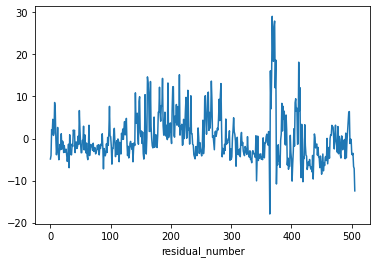

In [60]:
## residual 시각화
## 이때 residual은  fitted_multi_model 안에 있는 함수를 통해서 가져올 수 있음!

fitted_multi_model.resid.plot()
plt.xlabel("residual_number")
plt.show()

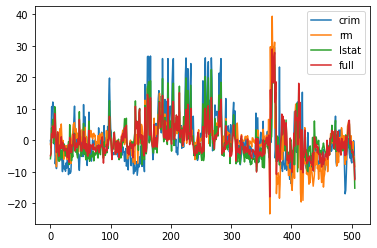

In [61]:
## 네 가지 경우의 잔차 플랏 한꺼번에 보기
fitted_model1.resid.plot(label="crim")
fitted_model2.resid.plot(label="rm")
fitted_model3.resid.plot(label="lstat")
fitted_multi_model.resid.plot(label="full")
plt.legend()

In [62]:
## -> full 모델의 잔차가 가장 0 근처에서 움직이며, 잔차의 합이 가장 작다.

## crim, rm, lstat, b, tax, age, zn, nox, indus 변수를 통한 다중선형회귀분석 

In [65]:
## boston 데이터에서 'CRIM','RM','LSTAT','B','TAX','AGE','ZN','NOX','INDUS' 변수 뽑기
x_data2=boston[['CRIM','RM','LSTAT','B','TAX','AGE','ZN','NOX','INDUS']]  ##변수 추가
x_data2.head()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
0,0.00632,6.575,4.98,396.90,296,65.2,18.0,0.538,2.31
1,0.02731,6.421,9.14,396.90,242,78.9,0.0,0.469,7.07
2,0.02729,7.185,4.03,392.83,242,61.1,0.0,0.469,7.07
3,0.03237,6.998,2.94,394.63,222,45.8,0.0,0.458,2.18
4,0.06905,7.147,5.33,396.90,222,54.2,0.0,0.458,2.18


In [68]:
## statsmodels.api(sm) 사용해서 x_data2_에 상수항 추가하기
x_data2_ = sm.add_constant(x_data2, has_constant='add')

## sm.OLS(y값, 데이터) 이용해서 (모델을) 회귀분석 적합시키기
multi_model2 = sm.OLS(target,x_data2_)
fitted_multi_model2=multi_model2.fit()

## 적합시킨 모델의 회귀분석 결과
fitted_multi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 19 Feb 2022   Prob (F-statistic):          5.76e-111
Time:                        23:55:05   Log-Likelihood:                -1565.5
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     496   BIC:                             3193.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1088      3.828     -1.857      0.064     -14.631       0.413
CRIM          -0.0453      0.036     -1.269      0.205      -0.115       0.025
RM             5.0922      0.458     11.109      0.000       4.192       5.993
LSTAT         -0.5651      0.057     -9.854      0.000      -0.678      -0.452
B              0.0090      0.003      2.952      0.003       0.003       0.015
TAX           -0.0060      0.002     -2.480      0.013      -0.011      -0.001
AGE            0.0236      0.014      1.653      0.099      -0.004       0.052
ZN             0.0294      0.013      2.198      0.028       0.003       0.056
NOX            3.4838      3.833      0.909      0.364      -4.047      11.014
INDUS          0.0293      0.065      0.449      0.654      -0.099       0.157
==============================================================================
Omnibus:                      195.490   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              872.873
Skew:                           1.686   Prob(JB):                    2.87e-190
Kurtosis:                       8.479   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
## 1. -> 변수가 6개 증가되었음에도 불구하고 R^2값은 2% 증가했다는 것.
## 2. rm변수의 p값이 

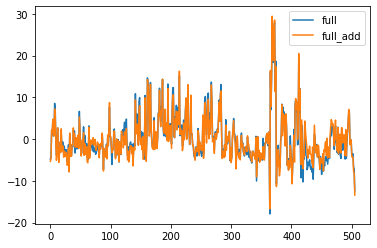

In [69]:
## full(세 개의 변수) 모델과 full_add(아홉 개의 변수) 모델의 잔차비교

import matplotlib.pyplot as plt
fitted_multi_model.resid.plot(label="full")
fitted_multi_model2.resid.plot(label="full_add")
plt.legend()

In [71]:
## -> 두 잔차 플랏을 통해서는 두 모델의 잔차에는 큰 차이가 없음을 확인할 수 있다.

## 상관계수/산점도를 통해 다중공선성 확인

In [73]:
## 행렬을 통해서 베타를 구할 때,
## ((X'X)^-1)(X'y)를 구하는데, 다중공선성이 심해지면,
## 이론적으로 (X'X)^-1 를 구할 수 없다.
## 그렇게 때문에 회귀계수 베타를 구할 수 없는 상황이 발생할 수 있다.

In [74]:
## 상관행렬 보기
x_data2.corr()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
CRIM,1.000000,-0.219247,0.455621,-0.385064,0.582764,0.352734,-0.200469,0.420972,0.406583
RM,-0.219247,1.000000,-0.613808,0.128069,-0.292048,-0.240265,0.311991,-0.302188,-0.391676
LSTAT,0.455621,-0.613808,1.000000,-0.366087,0.543993,0.602339,-0.412995,0.590879,0.603800
B,-0.385064,0.128069,-0.366087,1.000000,-0.441808,-0.273534,0.175520,-0.380051,-0.356977
TAX,0.582764,-0.292048,0.543993,-0.441808,1.000000,0.506456,-0.314563,0.668023,0.720760
AGE,0.352734,-0.240265,0.602339,-0.273534,0.506456,1.000000,-0.569537,0.731470,0.644779
ZN,-0.200469,0.311991,-0.412995,0.175520,-0.314563,-0.569537,1.000000,-0.516604,-0.533828
NOX,0.420972,-0.302188,0.590879,-0.380051,0.668023,0.731470,-0.516604,1.000000,0.763651
INDUS,0.406583,-0.391676,0.603800,-0.356977,0.720760,0.644779,-0.533828,0.763651,1.000000


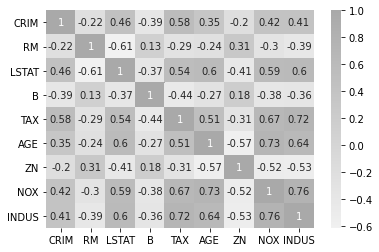

In [76]:
## 상관행렬 시각화해서 보기
import seaborn as sns;
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(x_data2.corr(), annot=True, cmap=cmap)
plt.show()

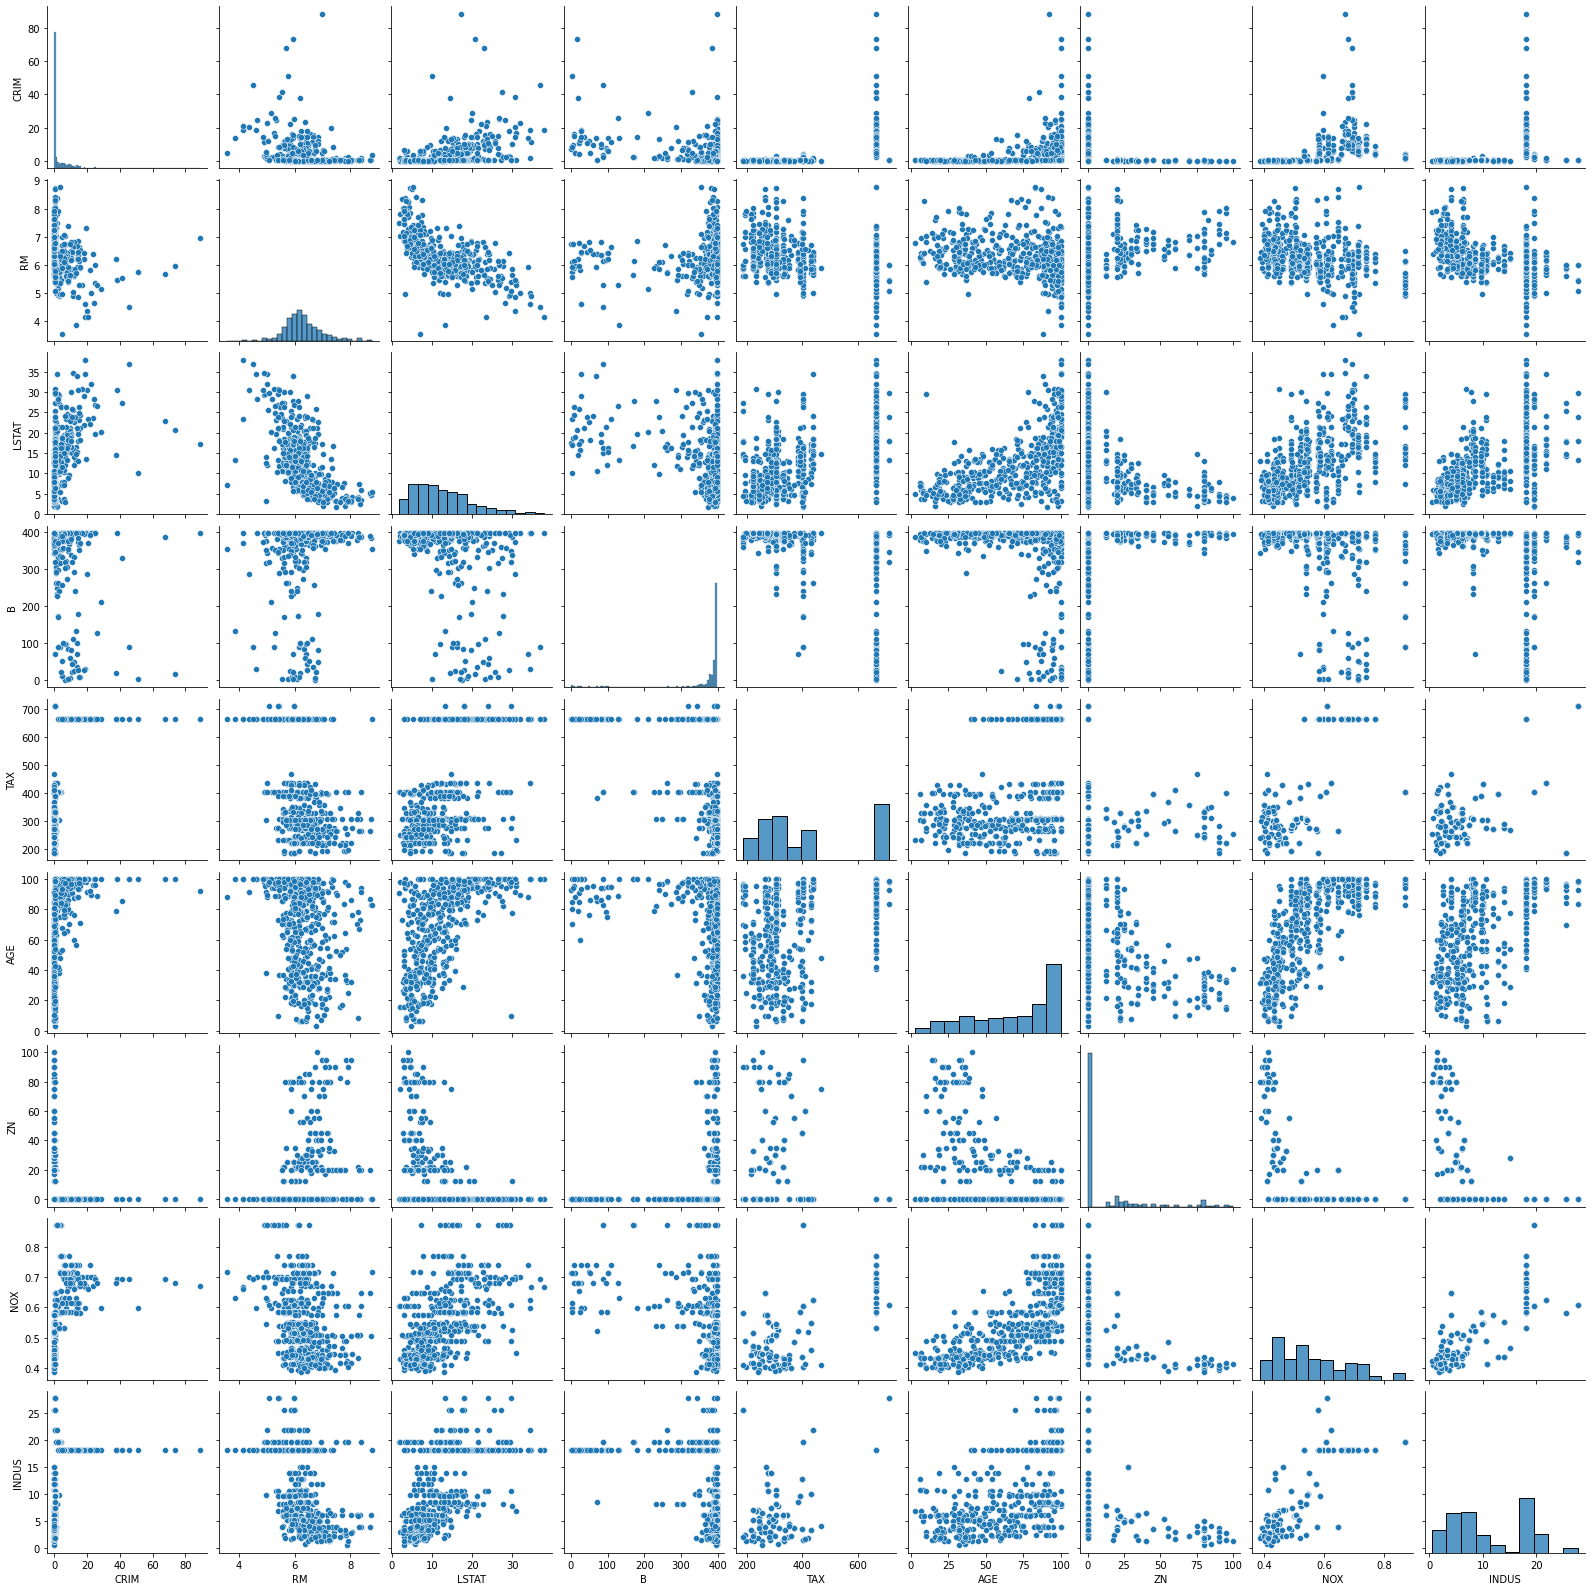

In [77]:
## 변수별 산점도 시각화
sns.pairplot(x_data2)
plt.show()

In [78]:
## VIF를 통한 다중공선성 확인

## vif는 statsmodels.stats.outliers_influence 에서 지원 됨!
from statsmodels.stats.outliers_influence import variance_inflation_factor

## vif라는 빈 데이터 프레임 만들기
vif = pd.DataFrame()
## "VIF Factor"라는 칼럼에는 모든 칼럼에 대해서 vif 를 돌려서 "VIF Factor"에 저장 
vif["VIF Factor"] = [variance_inflation_factor(
    x_data2.values, i) for i in range(x_data2.shape[1])]
## 이때, "features"에는 각 칼럼을 넣어라
vif["features"] = x_data2.columns
vif

,VIF Factor,features
0,1.917332,CRIM
1,46.535369,RM
2,8.844137,LSTAT
3,16.856737,B
4,19.923044,TAX
5,18.457503,AGE
6,2.086502,ZN
7,72.439753,NOX
8,12.642137,INDUS


In [81]:
## -> 'NOX'의 VIF가 72.439753으로 가장 큰 것을 확인할 수 있다.
## Q.'VIF란..?'
## A. VIF값을 구하려는 변수를 y로 두고, 나머지 변수들로 회귀를 돌렸을 때,
##    R^2(나머지 변수들이 y를 설명하는 비율)를 1에서 빼주고 역수 취한 값!!

## => 보통, VIF가 10 이상이면 다중공선성이 있다고 판단을 한다.

In [83]:
## 'NOX'변수 제거 후(X_data3) VIF 확인

vif = pd.DataFrame()
x_data3= x_data2.drop('NOX',axis=1)
vif["VIF Factor"] = [variance_inflation_factor(
    x_data3.values, i) for i in range(x_data3.shape[1])]
vif["features"] = x_data3.columns
vif

,VIF Factor,features
0,1.916648,CRIM
1,30.806301,RM
2,8.171214,LSTAT
3,16.735751,B
4,18.727105,TAX
5,16.339792,AGE
6,2.074500,ZN
7,11.217461,INDUS


In [84]:
## X_data3의 VIF 중에 가장 큰 값인 30.81값을 갖는 RM
## 'RM'변수 제거 후(X_data4) VIF 확인

vif = pd.DataFrame()
x_data4= x_data3.drop('RM',axis=1)
vif["VIF Factor"] = [variance_inflation_factor(
    x_data4.values, i) for i in range(x_data4.shape[1])]
vif["features"] = x_data4.columns
vif

,VIF Factor,features
0,1.907517,CRIM
1,7.933529,LSTAT
2,7.442569,B
3,16.233237,TAX
4,13.765377,AGE
5,1.820070,ZN
6,11.116823,INDUS


In [85]:
## Nox 변수 제거한 데이터(x_data3) 상수항 추가 후 회귀 모델 적합
## Nox, RM 변수 제거한 데이터(x_data4) 상수항 추가 후 회귀 모델 적합


x_data3_ = sm.add_constant(x_data3, has_constant='add')
x_data4_ = sm.add_constant(x_data4, has_constant='add')
model_vif = sm.OLS(target,x_data3_)
fitted_model_vif=model_vif.fit()
model_vif2 = sm.OLS(target,x_data4_)
fitted_model_vif2=model_vif2.fit()

In [86]:
## Q3. 위의 과정의 목적이 무엇인지 잘 모르겠어요...!

In [87]:
## 두 회귀 모델 결과 비교
fitted_model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     121.6
Date:                Sun, 20 Feb 2022   Prob (F-statistic):          7.62e-112
Time:                        08:55:52   Log-Likelihood:                -1566.0
No. Observations:                 506   AIC:                             3150.
Df Residuals:                     497   BIC:                             3188.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9162      3.596     -1.645      0.101     -12.981       1.149
CRIM          -0.0451      0.036     -1.264      0.207      -0.115       0.025
RM             5.1027      0.458     11.138      0.000       4.203       6.003
LSTAT         -0.5628      0.057     -9.825      0.000      -0.675      -0.450
B              0.0087      0.003      2.880      0.004       0.003       0.015
TAX           -0.0056      0.002     -2.344      0.019      -0.010      -0.001
AGE            0.0287      0.013      2.179      0.030       0.003       0.055
ZN             0.0284      0.013      2.130      0.034       0.002       0.055
INDUS          0.0486      0.062      0.789      0.431      -0.072       0.170
==============================================================================
Omnibus:                      193.530   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.773
Skew:                           1.677   Prob(JB):                    5.98e-184
Kurtosis:                       8.364   Cond. No.                     8.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
## NOX변수가 있는 회귀 모델과 없는 회귀 모델의 R^2 값이 거의 동일하다!
## -> 이 의미는 NOX변수가 차지하는 변동성이 굉장히 작다는 것을 의미한다.

In [88]:
## 두 회귀 모델 결과 비교
fitted_model_vif2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     97.20
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           5.53e-89
Time:                        08:56:45   Log-Likelihood:                -1622.3
No. Observations:                 506   AIC:                             3261.
Df Residuals:                     498   BIC:                             3294.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6634      1.844     16.087      0.000      26.041      33.286
CRIM          -0.0329      0.040     -0.825      0.410      -0.111       0.045
LSTAT         -0.9256      0.053    -17.589      0.000      -1.029      -0.822
B              0.0046      0.003      1.384      0.167      -0.002       0.011
TAX           -0.0048      0.003     -1.814      0.070      -0.010       0.000
AGE            0.0703      0.014      4.993      0.000       0.043       0.098
ZN             0.0513      0.015      3.490      0.001       0.022       0.080
INDUS         -0.0357      0.068     -0.523      0.601      -0.170       0.098
==============================================================================
Omnibus:                      138.742   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.077
Skew:                           1.427   Prob(JB):                     2.32e-69
Kurtosis:                       5.617   Cond. No.                     3.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
## 9개의 변수에서 6개의 변수로 줄였을 때도 변동성에 차이가 없었는데,
## RM변수를 줄였더니 변동성이 크게 준 것을 확인할 수 있다.
## 이는 RM변수가 Boston 집 값의 변동성을 설명 할 때 중요한 변수라 생각할 수 있다.

In [90]:
# sklearn 이용해서 학습 / 검증데이터 분할하기(보통 7:3, 8:2로 나눈다. 여기서는 7:3!)

from sklearn.model_selection import train_test_split
X = x_data2_
y = target
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state = 1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(354, 10) (152, 10) (354, 1) (152, 1)


In [91]:
## train_x 회귀모델 적합
train_x.head()
fit_1 = sm.OLS(train_y, train_x)
fit_1=fit_1.fit()

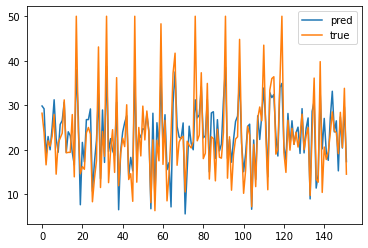

In [92]:
## 검증데이터에 대한 예측값과 실제값 비교
plt.plot(np.array(fit_1.predict(test_x)),label="pred")
plt.plot(np.array(test_y),label="true")
plt.legend()
plt.show()

In [93]:
## x_data3 와 x_data4 학습 데이터 분할

X = x_data3
y = target
train_x2, test_x2, train_y2, test_y2 = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state = 1)
print(train_x2.shape, test_x2.shape, train_y2.shape, test_y2.shape)

X = x_data4
y = target
train_x3, test_x3, train_y3, test_y3 = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state = 1)
print(train_x2.shape, test_x2.shape, train_y2.shape, test_y2.shape)

(354, 8) (152, 8) (354, 1) (152, 1)
(354, 8) (152, 8) (354, 1) (152, 1)


In [94]:
test_y.head()

,Target
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8


In [95]:
test_y2.head()

,Target
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8


In [98]:
test_y3.head()

,Target
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8


In [99]:
## -> 데이터의 인덱스가 동일하게 분할 되었음을 확일할 수 있다.

In [100]:
## x_data3 와 x_data4의 회귀 모델 적합하기
fit_2 = sm.OLS(train_y2,train_x2)
fit_2=fit_2.fit()
fit_3 = sm.OLS(train_y3,train_x3)
fit_3=fit_3.fit()

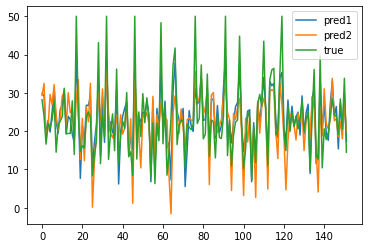

In [101]:
## true값과 예측값 비교 
plt.plot(np.array(fit_2.predict(test_x2)),label="pred1")
plt.plot(np.array(fit_3.predict(test_x3)),label="pred2")
plt.plot(np.array(test_y2),label="true")
plt.legend()
plt.show()

In [102]:
## -> 변수를 한 개만 제거한 것(pred1)이 두 개를 제거한 것(pred2)보다 더 나은 모습을 보인다. 

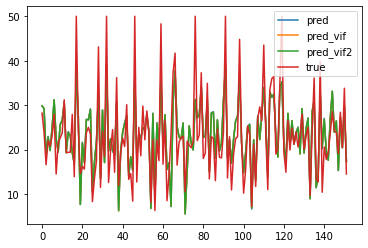

In [103]:
## full모델 추가해서 비교 
plt.plot(np.array(fit_1.predict(test_x)),label="pred")
plt.plot(np.array(fit_2.predict(test_x2)),label="pred_vif")
plt.plot(np.array(fit_2.predict(test_x2)),label="pred_vif2")
plt.plot(np.array(test_y2),label="true")
plt.legend()
plt.show()

In [104]:
## -> 변수 두 개를 제거한 것(pred_vif2)가 성능이 가장 안 좋은 것을 확인할 수 있다.

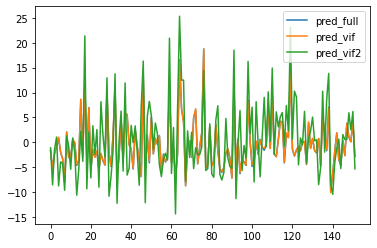

In [105]:
## 잔차(실제값- 예측값) plot 보기
plt.plot(np.array(test_y2['Target']-fit_1.predict(test_x)),label="pred_full")
plt.plot(np.array(test_y2['Target']-fit_2.predict(test_x2)),label="pred_vif")
plt.plot(np.array(test_y2['Target']-fit_3.predict(test_x3)),label="pred_vif2")
plt.legend()
plt.show()

In [106]:
## -> 잔차 plot에서도 변수 두 개를 제거한 pred_vif2가 가장 큰 잔차값을 갖는 것을 확인할 수 있다.

In [107]:
# MSE를 통한 검증데이터에 대한 성능비교

from sklearn.metrics import mean_squared_error

In [108]:
## 변수를 다 넣은 test 데이터의 MSE
mean_squared_error(y_true= test_y['Target'], y_pred= fit_1.predict(test_x))

26.148631468819854

In [110]:
## 변수를 하나 제거한 test 데이터의 MSE(NOX 변수 제거)
mean_squared_error(y_true= test_y['Target'], y_pred= fit_2.predict(test_x2))

25.594813292253537

In [111]:
## 변수를 두 개 제거한 test 데이터의 MSE(NOX와 RM 변수 제거)
mean_squared_error(y_true= test_y['Target'], y_pred= fit_3.predict(test_x3))

57.71900270631696

In [112]:
## -> MSE와 잔차는 작으면 작을수록 좋다!! 